In [3]:
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35
  libjbig2dec0 libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common
  texlive-base texlive-binaries texlive-latex-base xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvis

In [1]:
# coding=utf-8
from copy import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib as mtp
mtp.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

def annotate_barplot_dataframe(bar0, bar1, text, patches, dh=0.2, c='black'):
    """annotate a grouped barplot from a pandas dataframe
    An annotation is built from bar0 to bar1

    Args:
        bar0 (int): index of first bar
        bar1 (int): index of second bar
        text (string): what to write on the annotation
        patches (matplotlib.patches): data source
    """
    patches.sort(key=lambda x: x.xy[0])
    left = patches[bar0]
    right = patches[bar1]
    y = max(left._height, right._height) + dh

    l_bbox = left.get_bbox()
    l_mid = l_bbox.x1 - left._width / 2

    r_bbox = right.get_bbox()
    r_mid = r_bbox.x1 - right._width / 2
    barh = 0.07
    barx = [l_mid, l_mid, r_mid, r_mid]
    bary = [
        y,
        y + barh,
        y + barh,
        y,
    ]  # lower-left, upper-left, upper-right, lower-right
    plt.plot(barx, bary, c=c)
    kwargs = dict(ha="center", va="bottom")
    # if fs is not None:
    # kwargs['fontsize'] = fs
    mid = ((l_mid + r_mid) / 2, y + 0.01)
    plt.text(*mid, text, **kwargs)


def annotate_errors(l, r, text, dh=0.2):
    """annotate a grouped barplot from a pandas dataframe
    An annotation is built from bar0 to bar1

    Args:
        bar0 (int): index of first bar
        bar1 (int): index of second bar
        text (string): what to write on the annotation
        patches (matplotlib.patches): data source
    """
    # patches.sort(key=lambda x: x.xy[0])
    left = l
    right = r
    y = max(left._height, right._height) + dh

    l_bbox = left.get_bbox()
    l_mid = l_bbox.x1 - left._width / 2

    r_bbox = right.get_bbox()
    r_mid = r_bbox.x1 - right._width / 2
    barh = 0.07
    barx = [l_mid, l_mid, r_mid, r_mid]
    bary = [
        y,
        y + barh,
        y + barh,
        y,
    ]  # lower-left, upper-left, upper-right, lower-right
    plt.plot(barx, bary, c="black")
    kwargs = dict(ha="center", va="bottom")
    # if fs is not None:
    # kwargs['fontsize'] = fs
    mid = ((l_mid + r_mid) / 2, y + 0.01)
    plt.text(*mid, text, **kwargs)


[5.78 6.09 5.3  5.45 1.87 1.13 4.85 5.43]
[5.78 6.09 5.3  5.45 1.87 1.13 4.85 5.43]


ModuleNotFoundError: No module named 'google.colab'

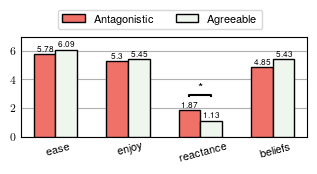

In [2]:

# c1 = {"ease":30.06,"enjoy":32.67,"reactance":42.85,"beliefs":29.21}
# c2 = {"ease":36.94,"enjoy":34.33,"reactance":24.15,"beliefs":37.79}

c1 = {"ease":5.78,"enjoy":5.3,"reactance":1.87,"beliefs":4.85}
c2 = {"ease":6.09,"enjoy":5.45,"reactance":1.13,"beliefs":5.43}


# df = pd.DataFrame.from_dict({c1,c2},orient='index')
df = pd.DataFrame([c1,c2]).T

fig, ax = plt.subplots(figsize=(3.7, 1.3))
width = 0.30
x = np.arange(df.shape[0])
# print(df.shape[0])
# fdfcdc
# plot data in grouped manner of bar type
plt.bar(x - width * 2,
        df.iloc[:,0],
        width,
        color='#f07167',
        edgecolor='black',
        hatch="",
        label="C1",
        zorder=3)
plt.bar(x - width,
        df.iloc[:,1],
        width,
        color='#eff6ee',
        edgecolor='black',
        hatch="",
        label="C2",
        zorder=3)

ax.set_ylim(0, 7)

patches = []
for p in ax.patches._axes.axes.containers:
    patches.extend(p.patches)
labels = ["ease","enjoy","reactance","beliefs"]
plt.xticks(x, labels)


ax.set_xticklabels(labels, rotation=15)
import matplotlib
dx =-0.3; dy = 0/72.
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
ax.tick_params(axis='both', which='both', length=0, labelsize=8)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

annotate_barplot_dataframe(4, 5, "*", patches, 1)  # *
ax.yaxis.grid(zorder=0)


handles, labels = ax.get_legend_handles_labels()
labels = ["Antagonistic", "Agreeable"]
lgd = ax.legend(handles,
                labels,
                bbox_to_anchor=(0.86, 1.02),
                loc="lower right",
                ncol=2,
                fancybox=True,
                prop={'size': 8})  # (x,y)


rects = ax.patches
print(df.values.flatten())
print(df.stack().values)
# Make some labels.
labels = df.values.flatten()

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 0.05, height, ha="center", va="bottom", size=6
    )

fn = "barplot.png"
plt.savefig(fname=fn, transparent = True, bbox_inches = 'tight', pad_inches = 0.05)

from google.colab import files

files.download(fn)
